# Measuring the errors in subset generation

__TODO__: COMBINE PLOTS?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
subset = pd.read_csv("C:/Users/Chloe/Documents/MaastrichtLaw&Tech/Thesis/MscThesis/sectioned_data_2022_improved.csv")
subset

,Unnamed: 0,ecli,date,inhoudsindicatie,instantie,rechtsgebied,wetsverwijzing,procesverloop,overwegingen,beslissing,year
0,23,ECLI:NL:CBB:2020:1024,2020-12-22,\nRegeling fosfaatreductieplan 2017. Geen verg...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Regeling fosfaatreductieplan 2017,\nProcesverloop \n\n\nBij besluiten van 2 dece...,"\nOverwegingen \n\n\nArtikel 8:75a, eerste lid...",\nBeslissing\n\n\nHet College\n\n\n\n- wijst h...,2020.0
1,30,ECLI:NL:CBB:2020:1030,2020-12-22,"\n\nartikel 23, derde lid, van de Meststoffenw...",College van Beroep voor het bedrijfsleven,Bestuursrecht,Meststoffenwet,\nProcesverloop \n\n\nBij besluit van 3 januar...,\nOverwegingen \n\n\n\nRelevante bepalingen\n\...,\nBeslissing\n\n\nHet College verklaart het be...,2020.0
2,31,ECLI:NL:CBB:2020:1031,2020-12-22,\n\nMeststoffenwet\nAppellant is er niet in ge...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Meststoffenwet,\nProcesverloop \n\n\nBij besluit van 10 janua...,\nOverwegingen \n\n\n\nRelevante bepalingen\n\...,\nBeslissing\n\n\nHet College verklaart het be...,2020.0
3,33,ECLI:NL:CBB:2020:1033,2020-12-21,\nBeslissing ogv art 8:29 Awb. Beperking kenni...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Algemene wet bestuursrecht 8:29,\nProcesverloop \n\n\nAppellant heeft beroep i...,\nOverwegingen \n\n1. Op grond van artikel 8:2...,\nBeslissing\n\n\nHet College: \n\n\n\nbeslist...,2020.0
4,39,ECLI:NL:CBB:2020:108,2020-02-25,"\nAwb 6:7, 6:8 en 6:11 Bezwaar niet-ontvankeli...",College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,\nProcesverloop \n\n\nBij besluit van 18 mei 2...,\nOverwegingen \n\n\n1.1.\nBij het bestreden b...,\nBeslissing\n\n\nHet College verklaart het be...,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
10453,52444,ECLI:NL:RBZWB:2022:885,2022-02-22,\nBeëindigen bijstandsuitkering o.g.v. de part...,Rechtbank Zeeland-West-Brabant,Bestuursrecht; Socialezekerheidsrecht,NaN,\nProcesverloop \nVerzoeker heeft bezwaar gema...,\nOverwegingen \n1. Verzoeker ontving een bijs...,\nBeslissing\n\n\nDe voorzieningenrechter wijs...,2022.0
10454,52451,ECLI:NL:RBZWB:2022:909,2022-02-23,\nWIA\n,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,\nProcesverloop \nEiseres heeft beroep ingeste...,\nOverwegingen \n1.\tFeiten\n\n\nEiseres is we...,\nBeslissing\nDe rechtbank verklaart het beroe...,2022.0
10455,52463,ECLI:NL:RBZWB:2022:951,2022-02-25,\nBBZ\n,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,\nProcesverloop\nIn een besluit van 24 januari...,\nOverwegingen1.Op grond van de stukken en de ...,\nBeslissing\n\n\nDe rechtbank verklaart het b...,2022.0
10456,52464,ECLI:NL:RBZWB:2022:953,2022-02-24,\n\nCompensatie transitievergoeding. \nOp mome...,Rechtbank Zeeland-West-Brabant,Bestuursrecht,NaN,\nProcesverloop\n\n\nIn het besluit van 15 dec...,\nOverwegingen\n\n\n\nFeiten\n\n\n1. Bij eiser...,\nBeslissing\n\n\nDe rechtbank: \n\n\n\nverkla...,2022.0


In [3]:
# Convert the string representations of lists to actual lists
subset['sections'] = subset['sections'].apply(ast.literal_eval)

KeyError: 'sections'

In [8]:
# Categorize each entry
def categorize_first_entry(list_entries):
    if not list_entries:  # Empty list check
        return 'Empty'
    first_entry = str(list_entries[0])
    if first_entry.startswith('1'):
        return 'Starts with 1'
    else:
        return 'Starts with other section'

In [ ]:
subset['category'] = subset['sections'].apply(categorize_first_entry)

# Get counts of each category using value_counts
category_counts_subset = subset['category'].value_counts().reset_index()

# Rename the columns to more meaningful names
category_counts_subset.columns = ['category', 'count']
category_counts_subset

,category,count
0,Starts with 1,6621
1,Starts with other section,2485
2,Empty,1352


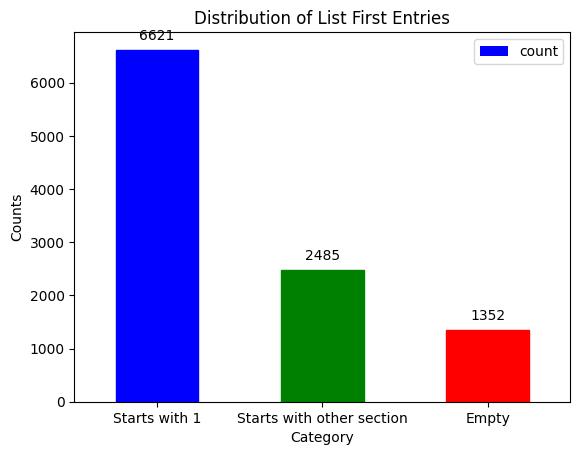

In [ ]:
# Create a bar chart
ax = category_counts_subset.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of List First Entries')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Keeps the category names horizontal
plt.xticks(ticks=range(len(category_counts_subset)), labels=category_counts_subset['category'])  # Label each tick

# Set colors for each bar specifically
colors = ['blue', 'green', 'red']  # Define your colors list
for bar, color in zip(ax.patches, colors):
    bar.set_color(color)  # Set color for each bar

# Annotate each bar with the count of entries
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
plt.savefig('Stats/error_rates_subset.png')
plt.close()

In [ ]:
# Calculate total number of entries
total_entries_subset = category_counts_subset['count'].sum()

# Calculate percentages for each category
category_counts_subset['percentage'] = (category_counts_subset['count'] / total_entries_subset) * 100

category_counts_subset['percentage']

0    63.310384
1    23.761714
2    12.927902
Name: percentage, dtype: float64

# Measuring errors in the full dataset

In [11]:
dataset = pd.read_csv("C:/Users/Chloe/Documents/MaastrichtLaw&Tech/Thesis/MscThesis/sectioned_data_2022_improved_fullset.csv")
dataset

,ecli,date,inhoudsindicatie,instantie,rechtsgebied,wetsverwijzing,procesverloop,overwegingen,beslissing,year,sections,ollama
0,ECLI:NL:CBB:2020:10,2020-01-07,"Artikel 23, derde en zesde lid, van de Mestst...",College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Bij besluit van 3 januari 2018...,Overwegingen 1.1 Appellante exploiteert een ...,Beslissing Het College: verklaart het beroep ...,2020.0,{1: '1.1\n\nAppellante exploiteert een melkvee...,{1: {'text': '1.1\n\nAppellante exploiteert ee...
1,ECLI:NL:CBB:2020:100,2020-02-18,"Fosfaatrechten. Artikel 23, derde en zesde li...",College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Bij besluit van 13 januari 201...,Overwegingen Relevante bepalingen 1.1. Ingev...,Beslissing Het College: - verklaart het beroe...,2020.0,"{1: '1.1.\nIngevolge artikel23, derde lid, van...","{1: {'text': '1.1.\nIngevolge artikel23, derde..."
2,ECLI:NL:CBB:2020:1001,2020-12-22,Fosfaatrechten. Knelgevallenregeling. Artikel...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Meststoffenwet,Procesverloop Bij besluit van 10 januari 201...,Overwegingen Relevante bepalingen 1.1 Ingevo...,Beslissing Het College - verklaart het beroep...,2020.0,"{1: '1.1\nIngevolge artikel23, derde lid, van ...","{1: {'text': '1.1\nIngevolge artikel23, derde ..."
3,ECLI:NL:CBB:2020:1002,2020-12-22,Fosfaatrechten. Knelgevallenregeling. Artikel...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Meststoffenwet,Procesverloop Bij besluit van 3 januari 2018...,Overwegingen Relevante bepalingen 1.1 Ingevo...,Beslissing Het College verklaart het beroep o...,2020.0,"{1: '1.1\nIngevolge artikel23, derde lid, van ...","{1: {'text': '1.1\nIngevolge artikel23, derde ..."
4,ECLI:NL:CBB:2020:1003,2020-12-22,Fosfaatrechten. Knelgevallenregeling. Uit de ...,College van Beroep voor het bedrijfsleven,Bestuursrecht,Meststoffenwet,Procesverloop Bij besluit van 10 januari 201...,Overwegingen Relevante bepalingen 1.1 Ingevo...,Beslissing Het College: - verklaart het beroe...,2020.0,"{1: '1.1\nIngevolge artikel23, derde lid, van ...","{1: {'text': '1.1\nIngevolge artikel23, derde ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ECLI:NL:CBB:2020:55,2020-01-28,"Hoger beroep niet-ontvankelijk, geen procesbe...",College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop in hoger beroep Appellante heef...,Overwegingen 1. Verweerder heeft aan appella...,Beslissing Het College verklaart het hoger be...,2020.0,{1: '1. Verweerder heeft aan appellante een bo...,{1: {'text': '1. Verweerder heeft aan appellan...
496,ECLI:NL:CBB:2020:550,2020-08-18,Verzetten ongegrond. Griffierecht niet tijdig...,College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Appellanten hebben beroep inges...,Overwegingen 1. De gemachtigde van appellante...,Beslissing Het College verklaart de verzetten...,2020.0,{1: '1. De gemachtigde van appellanten heeft n...,{1: {'text': '1. De gemachtigde van appellante...
497,ECLI:NL:CBB:2020:551,2020-08-18,Verzetten ongegrond. Griffierecht niet tijdig...,College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Appellanten hebben beroep inges...,Overwegingen 1. De gemachtigde van appellante...,Beslissing Het College verklaart de verzetten...,2020.0,{1: '1. De gemachtigde van appellanten heeft n...,{1: {'text': '1. De gemachtigde van appellante...
498,ECLI:NL:CBB:2020:552,2020-08-18,Verzetten ongegrond. Griffierecht niet tijdig...,College van Beroep voor het bedrijfsleven,Bestuursrecht,NaN,Procesverloop Appellanten hebben beroep inges...,Overwegingen 1. De gemachtigde van appellante...,Beslissing Het College verklaart de verzetten...,2020.0,{1: '1. De gemachtigde van appellanten heeft n...,{1: {'text': '1. De gemachtigde van appellante...


In [12]:
# Convert the string representations of lists to actual lists
dataset['sections'] = dataset['sections'].apply(ast.literal_eval)

In [13]:
dataset['category'] = dataset['sections'].apply(categorize_first_entry)

# Get counts of each category using value_counts
category_counts_dataset = dataset['category'].value_counts().reset_index()

# Rename the columns to more meaningful names
category_counts_dataset.columns = ['category', 'count']
category_counts_dataset

KeyError: 0

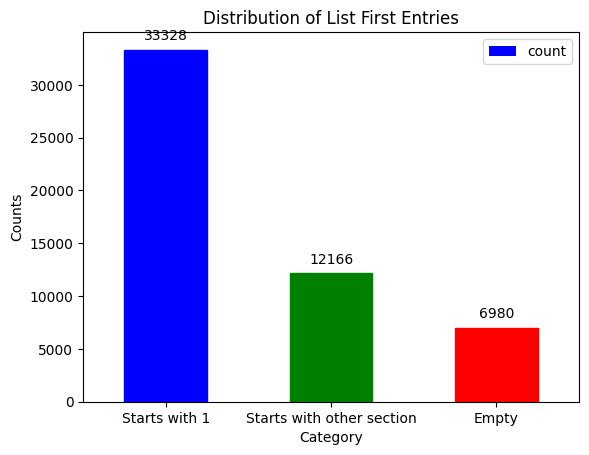

In [10]:
# Create a bar chart
ax1 = category_counts_dataset.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of List First Entries')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Keeps the category names horizontal
plt.xticks(ticks=range(len(category_counts_dataset)), labels=category_counts_dataset['category'])  # Label each tick

# Set colors for each bar specifically
colors = ['blue', 'green', 'red']  # Define your colors list
for bar, color in zip(ax1.patches, colors):
    bar.set_color(color)  # Set color for each bar

# Annotate each bar with the count of entries
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
plt.savefig('Stats/error_rates_dataset.png')
plt.close()

In [ ]:
# Calculate total number of entries
total_entries_dataset = category_counts_dataset['count'].sum()

# Calculate percentages for each category
category_counts_dataset['percentage'] = (category_counts_dataset['count'] / total_entries_dataset) * 100

category_counts_dataset['percentage']

0    63.469528
1    23.186721
2    13.343751
Name: percentage, dtype: float64